In [1]:
import pandas as pd
from pathlib import Path
file_path = "../Resources/iris.csv"
iris_df = pd.read_csv(file_path)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
new_iris_df = iris_df.drop(['class'], axis=1)
new_iris_df                           
                           

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
output_file_path = "../Resources/new_iris_data.csv"
new_iris_df.to_csv(output_file_path, index=False)

# Section 2

In [4]:
file_path = "../Resources/shopping_data.csv"
df_shopping = pd.read_csv(file_path)
df_shopping.head()

,CustomerID,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,Yes,19.0,15000,39.0
1,2,Yes,21.0,15000,81.0
2,3,No,20.0,16000,6.0
3,4,No,23.0,16000,77.0
4,5,No,31.0,17000,40.0


In [5]:
# Columns
df_shopping.columns

Index(['CustomerID', 'Card Member', 'Age', 'Annual Income',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Shape
print(df_shopping.shape)

(203, 5)


In [7]:
# Columns datatype
df_shopping.dtypes

CustomerID                  int64
Card Member                object
Age                       float64
Annual Income               int64
Spending Score (1-100)    float64
dtype: object

In [8]:
#Find null values
for column in df_shopping.columns:
    print(f"Column {column} has {df_shopping[column].isnull().sum()} null values")

Column CustomerID has 0 null values
Column Card Member has 2 null values
Column Age has 2 null values
Column Annual Income has 0 null values
Column Spending Score (1-100) has 1 null values


In [9]:
# Drop null rows
df_shopping = df_shopping.dropna()

In [10]:
# Shape after Null Values
print(df_shopping.shape)

(200, 5)


In [11]:
#Find null values
for column in df_shopping.columns:
    print(f"Column {column} has {df_shopping[column].isnull().sum()} null values")

Column CustomerID has 0 null values
Column Card Member has 0 null values
Column Age has 0 null values
Column Annual Income has 0 null values
Column Spending Score (1-100) has 0 null values


In [12]:
#Find duplicate entries
print(f"Duplicate entries: {df_shopping.duplicated().sum()}")

Duplicate entries: 0


In [13]:
#Remove the CustomerID Column
df_shopping.drop(columns=["CustomerID"],inplace=True)
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,Yes,19.0,15000,39.0
1,Yes,21.0,15000,81.0
2,No,20.0,16000,6.0
3,No,23.0,16000,77.0
4,No,31.0,17000,40.0


In [14]:
#Transofrming the string column to Number
def change_string(member):
    if member == "Yes":
        return 1
    else:
        return 0
    
df_shopping["Card Member"] = df_shopping["Card Member"].apply(change_string)
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100)
0,1,19.0,15000,39.0
1,1,21.0,15000,81.0
2,0,20.0,16000,6.0
3,0,23.0,16000,77.0
4,0,31.0,17000,40.0


In [15]:
#Transform annual income
df_shopping["Anual Income"] = df_shopping["Annual Income"]/1000
df_shopping.head()

,Card Member,Age,Annual Income,Spending Score (1-100),Anual Income
0,1,19.0,15000,39.0,15.0
1,1,21.0,15000,81.0,15.0
2,0,20.0,16000,6.0,16.0
3,0,23.0,16000,77.0,16.0
4,0,31.0,17000,40.0,17.0


In [16]:
# Saving cleaned data
file_path = "../Resources/shopping_data_cleaned.csv"
df_shopping.to_csv(file_path, index=False)

OSError: Cannot save file into a non-existent directory: 'Resources'

# K-means Algorithm

K-means is an unsupervised learning algorithm used to identify and solve clustering issues.

K represents how many clusters there will be. These clusters are then determined by the means of all the points that will belong to the cluster.

The K-means algorithm groups the data into K clusters, where belonging to a cluster is based on some similarity or distance measure to a centroid.

A centroid is a data point that is the arithmetic mean position of all the points on a cluster:


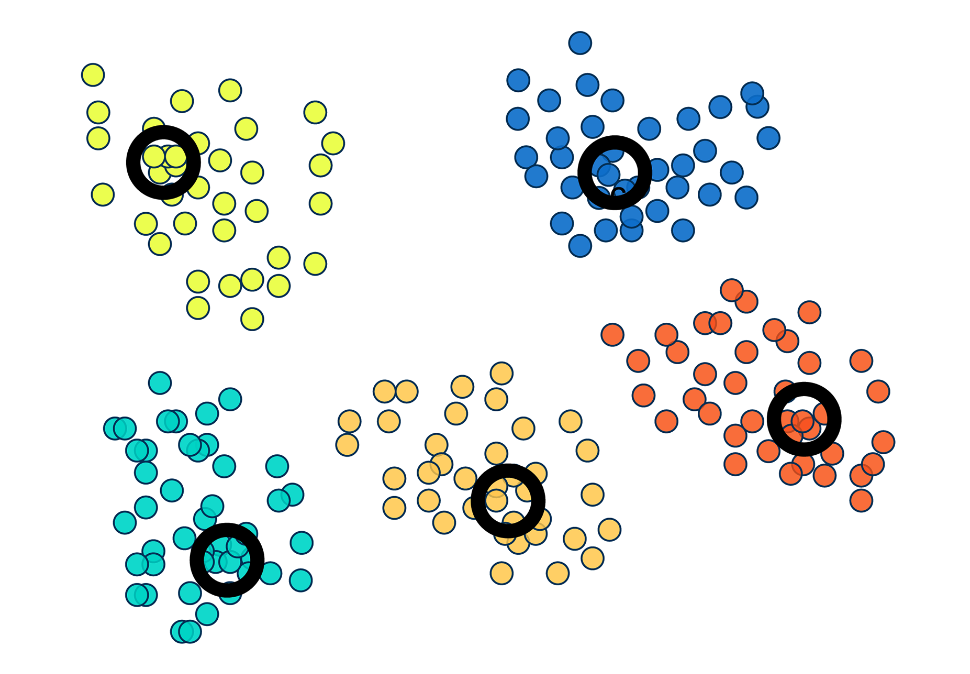

In [ ]:
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans


In [ ]:
file_path = "Resources/new_iris_data.csv"
df_iris = pd.read_csv(file_path)
df_iris.head()

In [ ]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)
model

In [ ]:
# Fitting model
model.fit(df_iris)

In [ ]:
# Get the predictions
predictions = model.predict(df_iris)
print(predictions)

In [ ]:
# Add a new class column to the df_iris
df_iris["class"] = model.labels_
df_iris.head()

# Visualize the Results

In [ ]:
import plotly.express as px
import hvplot.pandas

In [ ]:
# Create a scatterplot of df_iris
df_iris.hvplot.scatter(x="sepal_length", y="sepal_width", by="class")

In [ ]:
# Plotting the clusters with three features
fig = px.scatter_3d(df_iris, x="petal_width", y="sepal_length", z="petal_length", color="class", symbol="class", size="sepal_width",width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()